# Verlet Algorithm

The Verlet algorithm is a numerical method used to integrate Newton's equations of motion.
It is a symplectic integrator, which means that it conserves energy.
The Verlet algorithm is used to simulate the motion of particles in a potential field.
It is widely used in molecular dynamics simulations and other areas of physics.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Lenard-Jones Potential

The Lenard-Jones potential is a mathematical model that describes
the interaction between two neutral atoms or molecules.
It is used to model the interatomic forces in molecular dynamics simulations.
The Lenard-Jones potential is given by the following equation:

In [11]:
def lenard_jones_potential(x):
    return 4 * (1 / x**12 - 1 / x**6)

In [12]:
def U(x):
    return (48 / x ** 13) - (24 / x ** 7)

In [15]:
def verlet_algorithm(x0, v0, dt, n):

    x_trajectory = np.zeros(n)
    v_trajectory = np.zeros(n)
    acceleration = np.zeros(n)
    x_trajectory[0] = x0
    v_trajectory[0] = v0
    acceleration[0] = lenard_jones_potential(x_trajectory[0])

    for i in range(1, n):
        x_trajectory[i] = x_trajectory[i-1] + v_trajectory[i-1] * dt + 0.5 * acceleration[i-1] * dt**2
        acceleration[i] = lenard_jones_potential(x_trajectory[i])
        v_trajectory[i] = v_trajectory[i-1] + 0.5 * (acceleration[i-1] + acceleration[i]) * dt

    return x_trajectory, v_trajectory

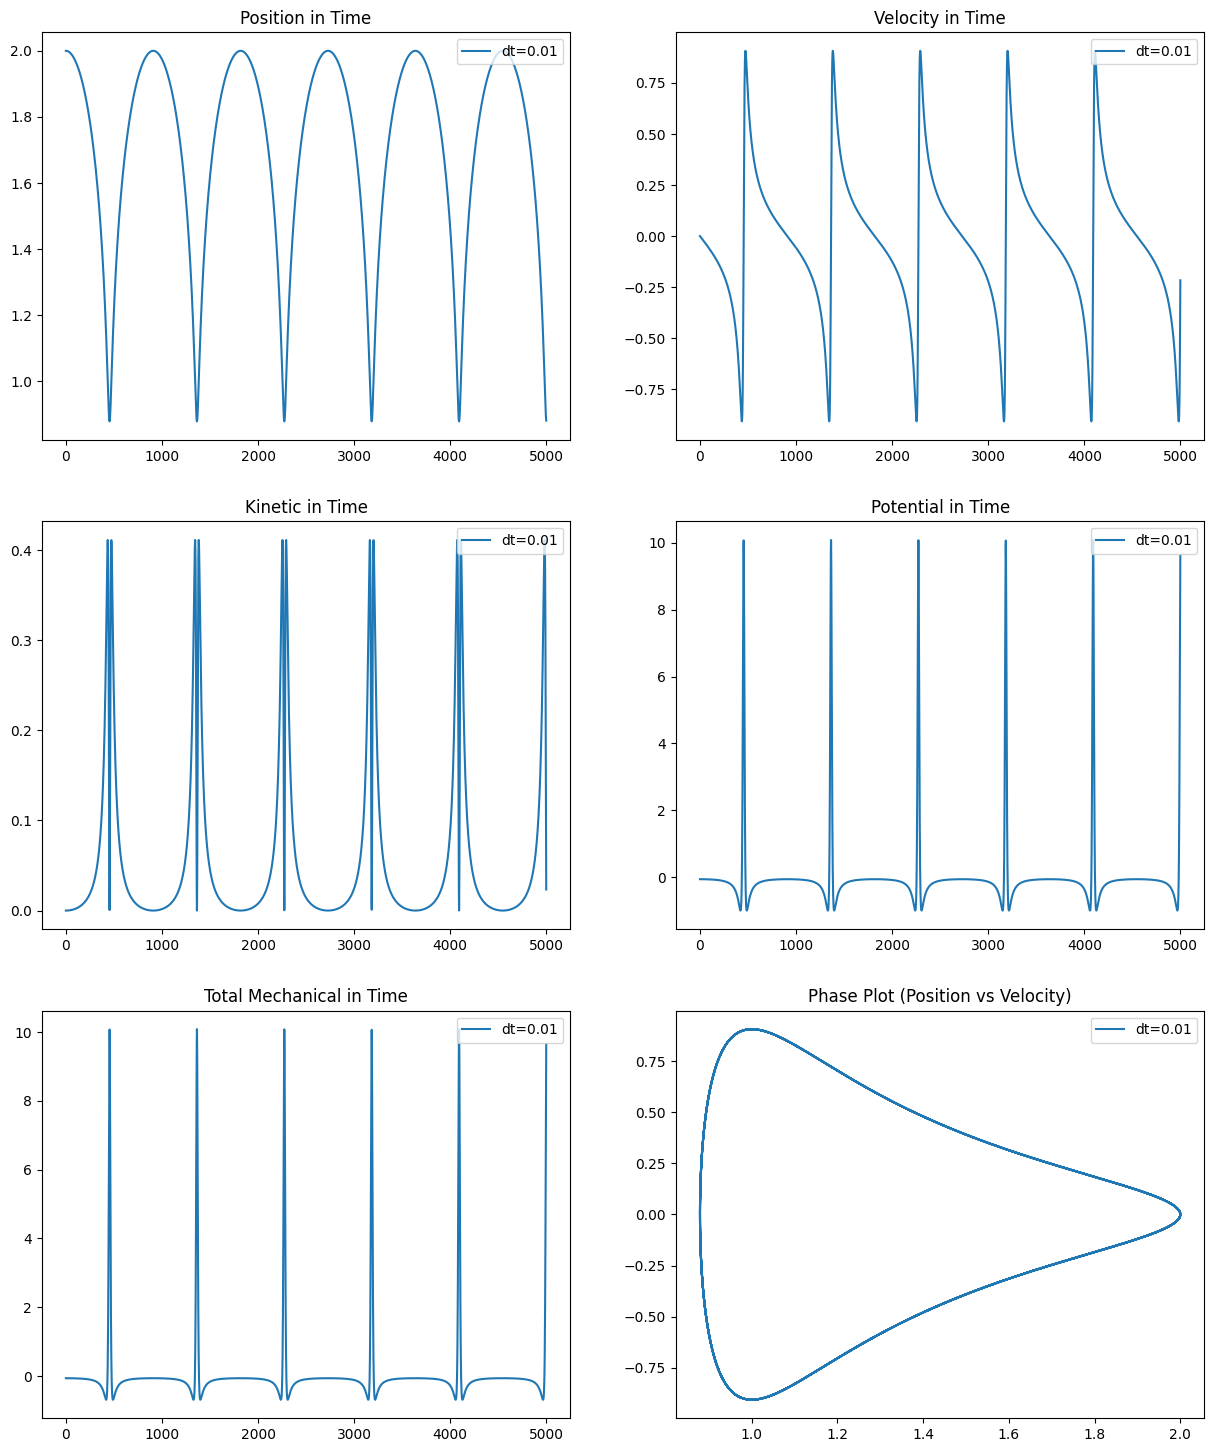

In [16]:
figure, axis = plt.subplots(3, 2, figsize=(15, 18))
dt_values = [0.01]
n = 5000
for dt in dt_values:
    x, v = verlet_algorithm(2.0, 0.0, dt, n)
    kinetic_energy = 0.5 * v**2
    potential_energy = lenard_jones_potential(x)
    total_mechanical_energy = kinetic_energy + potential_energy

    axis[0,0].plot(range(n), x, label=f'dt={dt}')
    axis[0,1].plot(range(n), v, label=f'dt={dt}')
    axis[1,0].plot(range(n), kinetic_energy, label=f'dt={dt}')
    axis[1,1].plot(range(n), potential_energy, label=f'dt={dt}')
    axis[2,0].plot(range(n), total_mechanical_energy, label=f'dt={dt}')
    axis[2,1].plot(x, v, label=f'dt={dt}')

axis[0, 0].set_title("Position in Time")
axis[0, 1].set_title("Velocity in Time")
axis[1, 0].set_title("Kinetic in Time")
axis[1, 1].set_title("Potential in Time")
axis[2, 0].set_title("Total Mechanical in Time")
axis[2, 1].set_title("Phase Plot (Position vs Velocity)")

for ax in axis.flat:
    ax.legend(loc="upper right")